In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
from glob import glob

In [80]:
df_train = pd.read_csv(r"C:\Users\Angelique\Downloads\archive\train_data.csv")
df_train

,Unnamed: 0,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [81]:
df_train.shape

(54214, 4)

In [54]:
df_train.columns

Index(['Unnamed: 0', 'TITLE', 'GENRE', 'DESCRIPTION'], dtype='object')

In [56]:
df_train.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [65]:
df_train.isnull().sum()

MovieID        0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [58]:
df_train.describe()

,Unnamed: 0
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [159]:
df_train.loc[:,'DESCRIPTION'] = df_train['DESCRIPTION'].astype(str).str.lower()
df_test.loc[:,'DESCRIPTION'] = df_test['DESCRIPTION'].astype(str).str.lower()

In [160]:
df_train.rename(columns={'Unnamed: 0': 'MovieID'}, inplace= True)

df_train.head()

,MovieID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,listening in to a conversation between his do...
1,2,Cupid (1997),thriller,a brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,to help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,the film's title refers not only to the un-re...


In [161]:
df_train.duplicated().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

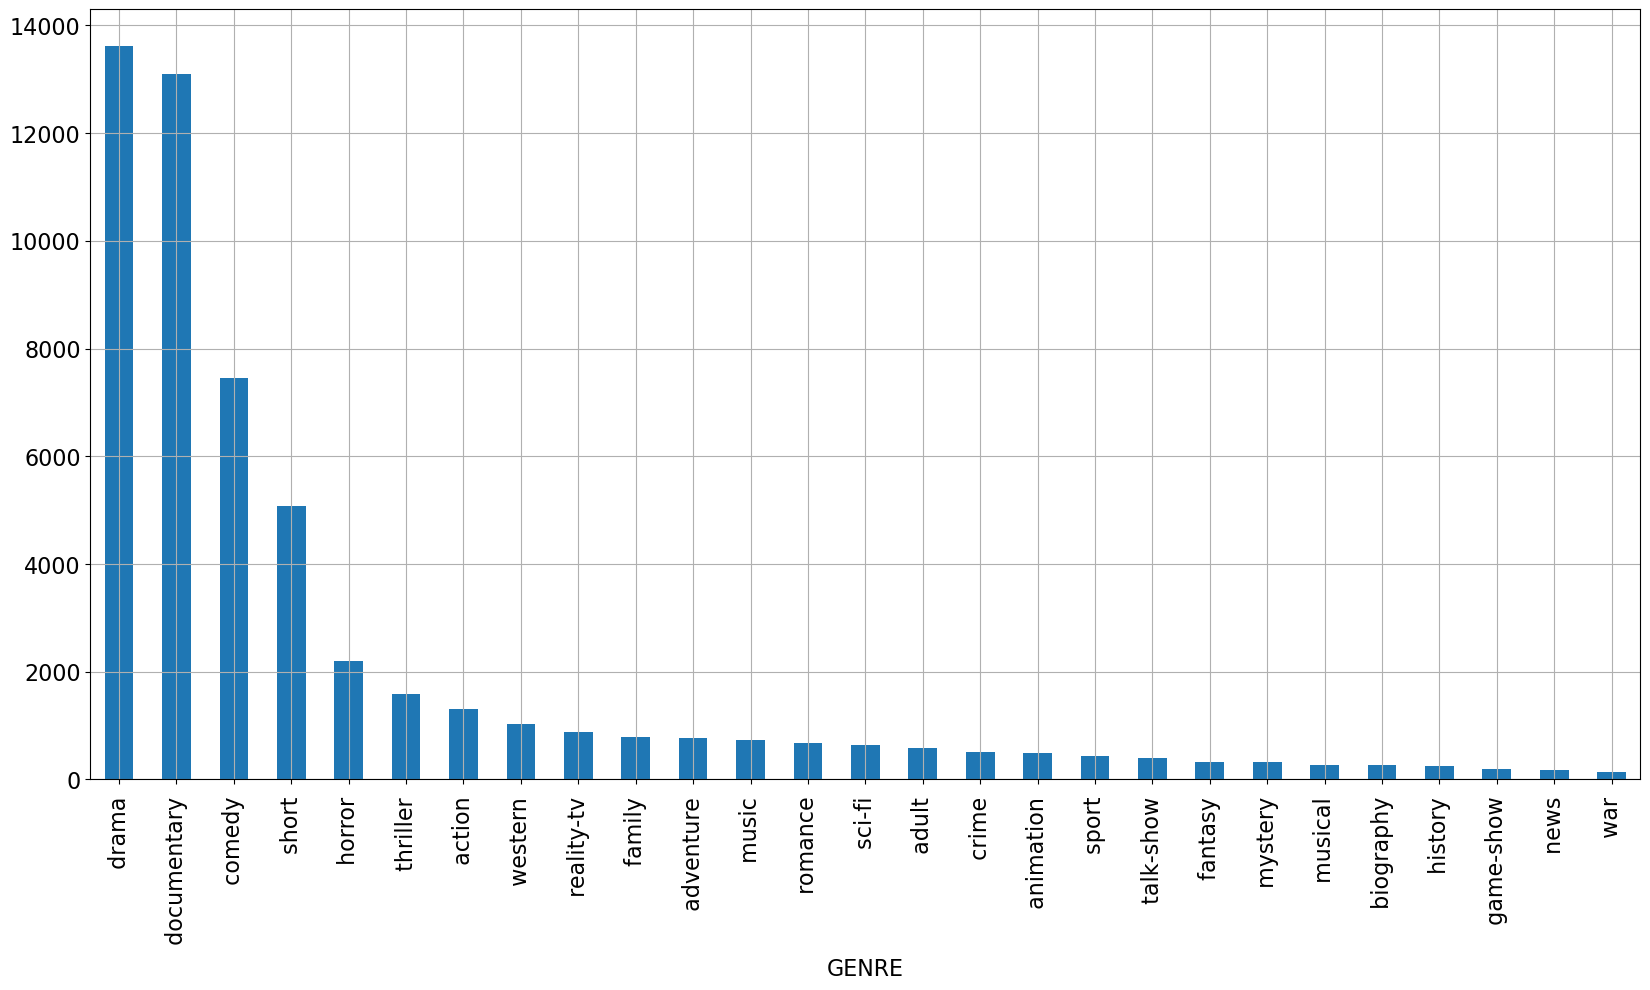

In [91]:
genre =df_train['GENRE'].value_counts()
plt.figure(figsize=(20,10))
genre.plot(kind='bar')
plt.title='Movies Genre'
plt.xlabel='Genre' 
plt.ylabel='No. of Movies'
plt.xticks(rotation=90)
plt.show

In [162]:
df_test = pd.read_csv(r"C:\Users\Angelique\Downloads\archive\test_data.csv")
df_test.head()

,Unnamed: 0,TITLE,DESCRIPTION
0,0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,2,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,4,Er nu zhai (1955),Before he was known internationally as a mart...


In [115]:
df_test.columns

Index(['Unnamed: 0', 'TITLE', 'DESCRIPTION'], dtype='object')

In [116]:
df_test.shape

(54200, 3)

In [117]:
df_test.duplicated().sum()

0

In [123]:
df_test.isnull().sum()

MovieID        0
TITLE          0
DESCRIPTION    0
dtype: int64

In [118]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [120]:
df_test.describe()

,Unnamed: 0
count,54200.000000
mean,27099.500000
std,15646.336632
min,0.000000
25%,13549.750000
50%,27099.500000
75%,40649.250000
max,54199.000000


In [121]:
df_test.rename(columns={'Unnamed: 0': 'MovieID'}, inplace= True)

df_test.head()

,MovieID,TITLE,DESCRIPTION
0,0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,2,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,4,Er nu zhai (1955),Before he was known internationally as a mart...


In [128]:
x_train_full = df_train['DESCRIPTION']
y_train_full = df_train['GENRE']

x_test = df_test['DESCRIPTION']


In [145]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(x_train_full , y_train_full , test_size=0.2 , random_state=42)

In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words ='english' , max_features=5000)
X_train_tfigf = tfidf.fit_transform(X_train)
X_test_tfidf= tfidf.transform(X_test)

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_test_vectors = vectorizer.fit_transform(X_test)

In [138]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, Y_train)

LogisticRegression(max_iter=1000)

In [147]:
y_pred = lr.predict(X_test_tfidf)

In [148]:
y_pred

array([' comedy ', ' drama ', ' horror ', ..., ' drama ', ' short ',
       ' horror '], dtype=object)

In [105]:
accuracy_val = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy_val)
print("Validation Classification Report:")
print(classification_report(Y_test, y_pred, zero_division=0))

Validation Accuracy: 0.5796366319284331
Validation Classification Report:
               precision    recall  f1-score   support

      action        0.58      0.08      0.14       263
       adult        0.88      0.06      0.12       112
   adventure        0.29      0.03      0.05       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.44      0.47      1443
       crime        0.00      0.00      0.00       107
 documentary        0.58      0.88      0.70      2659
       drama        0.46      0.83      0.59      2697
      family        1.00      0.01      0.01       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.15      0.26        40
     history        0.00      0.00      0.00        45
      horror        0.73      0.36      0.48       431
       music        0.77      0.12      0.20       144
     musical        0.00      0.00      0.00 

In [171]:
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test_tfidf)
accuracy_test = accuracy_score(Y_test, y_pred)
print("\nTest Accuracy:", accuracy_test)
print("Test Classification Report:")
print(classification_report(Y_test, y_pred, zero_division=0))


Test Accuracy: 0.5796366319284331
Test Classification Report:
               precision    recall  f1-score   support

      action        0.52      0.26      0.35       263
       adult        0.71      0.21      0.33       112
   adventure        0.41      0.14      0.21       139
   animation        0.65      0.11      0.18       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.58      0.55      1443
       crime        0.43      0.03      0.05       107
 documentary        0.66      0.85      0.74      2659
       drama        0.55      0.78      0.64      2697
      family        0.41      0.07      0.12       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.94      0.42      0.59        40
     history        0.00      0.00      0.00        45
      horror        0.63      0.56      0.59       431
       music        0.64      0.47      0.54       144
     musical        1.00      0.02      0.04        50
 